In [1]:
import os
import glob
import cv2

In [2]:
def load_images(class_name):
    folder_path = 'C://Users//User//Documents//SRF//proiect//dataset//' + class_name
    
    image_paths = glob.glob(os.path.join(folder_path, '*.jpg'))
    # print("Found image paths:", image_paths)
    
    images = []
    for image_path in image_paths:
        image = cv2.imread(image_path)
        if image is not None: 
            images.append(image)
            
    print(f"Loaded {len(images)} images.")
    return images

In [3]:
backyard_images = load_images('backyard')
frontyard_images = load_images('frontyard')
bathroom_images = load_images('bathroom')
bedroom_images = load_images('bedroom')
kitchen_images = load_images('kitchen')
living_room_images = load_images('livingRoom')

Loaded 551 images.
Loaded 602 images.
Loaded 585 images.
Loaded 1168 images.
Loaded 748 images.
Loaded 593 images.


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
def extract_features(images):
    features = []
    for image in images:
        resized_image = cv2.resize(image, (512, 512))
        hsv_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2HSV)
        hist = cv2.calcHist([hsv_image], [0, 1, 2], None, [64, 64, 64], [0, 256, 0, 256, 0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        features.append(hist)
    return np.array(features)

In [ ]:
backyard_features = extract_features(backyard_images)
frontyard_features = extract_features(frontyard_images)
bathroom_features = extract_features(bathroom_images)
bedroom_features = extract_features(bedroom_images)
kitchen_features = extract_features(kitchen_images)
living_room_features = extract_features(living_room_images)

backyard_labels = np.zeros(len(backyard_features))
frontyard_labels = np.ones(len(frontyard_features))
bathroom_labels = np.full(len(bathroom_features), 2)
bedroom_labels = np.full(len(bedroom_features), 3)
kitchen_labels = np.full(len(kitchen_features), 4)
living_room_labels = np.full(len(living_room_features), 5)

X = np.vstack([backyard_features, frontyard_features, bathroom_features, bedroom_features, kitchen_features, living_room_features])
y = np.hstack([backyard_labels, frontyard_labels, bathroom_labels, bedroom_labels, kitchen_labels, living_room_labels])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.ensemble import RandomForestClassifier
import joblib

rf = RandomForestClassifier(n_estimators=300, random_state=42, criterion='entropy')

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

model_path = "model.joblib"
joblib.dump(rf, model_path)

Accuracy: 54.00%


['model.joblib']

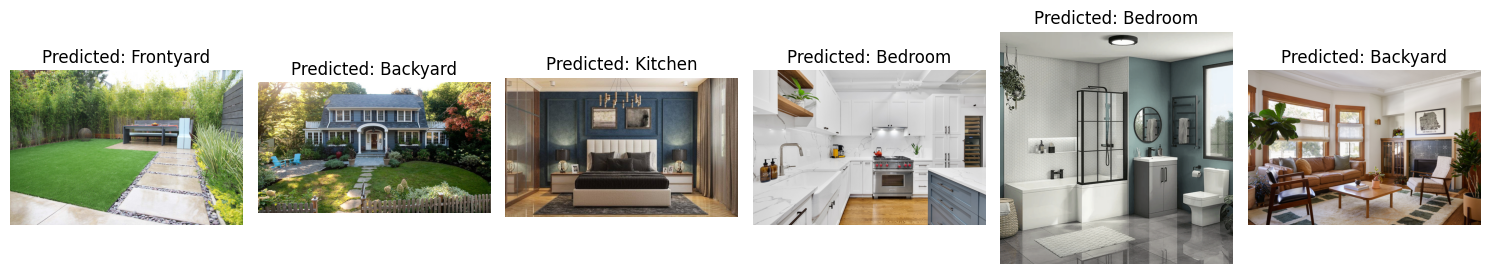

In [17]:
import matplotlib.pyplot as plt

example_folder = "C://Users//User//Documents//SRF//proiect//dataset//example//"
example_image_paths = glob.glob(os.path.join(example_folder, "*.jpg"))[:6] 
rf_model = joblib.load(model_path)

example_images = [cv2.imread(image_path) for image_path in example_image_paths]
example_features = extract_features(example_images)
predicted_labels = rf_model.predict(example_features)

label_names = ['Backyard', 'Frontyard', 'Bathroom', 'Bedroom', 'Kitchen', 'Living Room']
predicted_classes = [label_names[int(label)] for label in predicted_labels]

fig, axs = plt.subplots(1, len(example_images), figsize=(15, 5))
for idx, (image, predicted_class) in enumerate(zip(example_images, predicted_classes)):
    if image is not None:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axs[idx].imshow(image_rgb)
        axs[idx].set_title(f"Predicted: {predicted_class}")
        axs[idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

knn = KNeighborsClassifier(n_neighbors = 40, metric='manhattan')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

model_path = "knn_model.joblib"
joblib.dump(knn, model_path) ;